# Import the Liverpool Football Club English Premier League data file.

In [0]:
# import pandas library as pd.
import pandas as pd 

# read in the LiverpoolFootballClub_all csv file.
LPFC = pd.read_csv('https://raw.githubusercontent.com/CVanchieri/LSDS-DataSets/master/EnglishPremierLeagueData/LiverpoolFootballClubData_EPL.csv')
# show the data frame shape.
print('LPFC =', LPFC.shape)
# show the data frame with headers.
LPFC.head()

LPFC = (1005, 161)


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Attendance,Referee,HS,AS,HST,AST,HHW,AHW,HC,AC,HF,AF,HO,AO,HY,AY,HR,AR,HBP,ABP,GBH,GBD,GBA,IWH,IWD,IWA,LBH,LBD,LBA,SBH,...,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,25/08/93,Liverpool,Tottenham,1,2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,28/08/93,Liverpool,Leeds,2,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,12/09/93,Liverpool,Blackburn,0,1,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,02/10/93,Liverpool,Arsenal,0,0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Organizing columns & headers.

In [0]:
# group the columns we want to use.
columns = ["Div", "Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR", 
           "HTHG", "HTAG", "HTR", "HS", "AS", "HST", "AST", "HHW", "AHW", 
           "HC", "AC", "HF", "AF", "HO", "AO", "HY", "AY", "HR", "AR", "HBP", "ABP"]
# create a new data frame with just the grouped columns.
LPFC = LPFC[columns]
# relableing columns for better understanding.
LPFC = LPFC.rename(columns={"Div": "Division", "Date": "GameDate", "FTHG": "FullTimeHomeGoals", "FTAG": "FullTimeAwayGoals", 
                            "FTR": "FullTimeResult", "HTHG": "HalfTimeHomeGoals", "HTAG": "HalfTimeAwayGoals", "HTR": "HalfTimeResult", 
                            "HS": "HomeShots", "AS": "AwayShots", "HST": "HomeShotsOnTarget", "AST": "AwayShotsOnTarget", 
                            "HHW": "HomeShotsHitFrame", "AHW": "AwayShotsHitFrame", "HC": "HomeCorners", "AC": "AwayCorners", 
                            "HF": "HomeFouls", "AF": "AwayFouls", "HO": "HomeOffSides", "AO": "AwayOffSides", "HY": "HomeYellowCards", 
                           "AY": "AwayYellowCards", "HR": "HomeRedCards", "AR": "AwayRedCards", "HBP": "HomeBookingPoints_Y5_R10", 
                           "ABP": "AwayBookingPoints_Y5_R10"})
# show the data frame with headers.
print(LPFC.shape)
LPFC.head()

(1005, 28)


,Division,GameDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeShotsHitFrame,AwayShotsHitFrame,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeOffSides,AwayOffSides,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,HomeBookingPoints_Y5_R10,AwayBookingPoints_Y5_R10
0,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,25/08/93,Liverpool,Tottenham,1,2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,28/08/93,Liverpool,Leeds,2,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,12/09/93,Liverpool,Blackburn,0,1,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,02/10/93,Liverpool,Arsenal,0,0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Baseline accuracy score.

In [0]:
# import accuracy_score from sklearn.metrics library.
from sklearn.metrics import accuracy_score

# determine 'majority class' baseline starting point for every prediction.
# single out the target, 'FullTimeResult' column.
target = LPFC['FullTimeResult']
# create the majority class with setting the 'mode' on the target data.
majority_class = target.mode()[0]
# create the y_pred data.
y_pred = [majority_class] * len(target)
# accuracy score for the majority class baseline = frequency of the majority class.
ac = accuracy_score(target, y_pred)
print("'Majority Baseline' Accuracy Score =", ac)

'Majority Baseline' Accuracy Score = 0.4746268656716418


# Data exploration.

In [0]:
# show the data frame columns.
LPFC.columns

Index(['Division', 'GameDate', 'HomeTeam', 'AwayTeam', 'FullTimeHomeGoals',
       'FullTimeAwayGoals', 'FullTimeResult', 'HalfTimeHomeGoals',
       'HalfTimeAwayGoals', 'HalfTimeResult', 'HomeShots', 'AwayShots',
       'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeShotsHitFrame',
       'AwayShotsHitFrame', 'HomeCorners', 'AwayCorners', 'HomeFouls',
       'AwayFouls', 'HomeOffSides', 'AwayOffSides', 'HomeYellowCards',
       'AwayYellowCards', 'HomeRedCards', 'AwayRedCards',
       'HomeBookingPoints_Y5_R10', 'AwayBookingPoints_Y5_R10'],
      dtype='object')

In [0]:
# show the data feature types.
LPFC.dtypes

Division                     object
GameDate                     object
HomeTeam                     object
AwayTeam                     object
FullTimeHomeGoals             int64
FullTimeAwayGoals             int64
FullTimeResult               object
HalfTimeHomeGoals           float64
HalfTimeAwayGoals           float64
HalfTimeResult               object
HomeShots                   float64
AwayShots                   float64
HomeShotsOnTarget           float64
AwayShotsOnTarget           float64
HomeShotsHitFrame           float64
AwayShotsHitFrame           float64
HomeCorners                 float64
AwayCorners                 float64
HomeFouls                   float64
AwayFouls                   float64
HomeOffSides                float64
AwayOffSides                float64
HomeYellowCards             float64
AwayYellowCards             float64
HomeRedCards                float64
AwayRedCards                float64
HomeBookingPoints_Y5_R10    float64
AwayBookingPoints_Y5_R10    

In [0]:
# show all the NaN's.
LPFC.isna().sum()

Division                      0
GameDate                      0
HomeTeam                      0
AwayTeam                      0
FullTimeHomeGoals             0
FullTimeAwayGoals             0
FullTimeResult                0
HalfTimeHomeGoals            84
HalfTimeAwayGoals            84
HalfTimeResult               84
HomeShots                   274
AwayShots                   274
HomeShotsOnTarget           274
AwayShotsOnTarget           274
HomeShotsHitFrame           929
AwayShotsHitFrame           929
HomeCorners                 274
AwayCorners                 274
HomeFouls                   274
AwayFouls                   274
HomeOffSides                929
AwayOffSides                929
HomeYellowCards             274
AwayYellowCards             274
HomeRedCards                274
AwayRedCards                274
HomeBookingPoints_Y5_R10    929
AwayBookingPoints_Y5_R10    929
dtype: int64

In [0]:
# show the statistics of numericals of the data frame.
LPFC.describe()

,FullTimeHomeGoals,FullTimeAwayGoals,HalfTimeHomeGoals,HalfTimeAwayGoals,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeShotsHitFrame,AwayShotsHitFrame,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeOffSides,AwayOffSides,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,HomeBookingPoints_Y5_R10,AwayBookingPoints_Y5_R10
count,1005.000000,1005.000000,921.000000,921.000000,731.000000,731.000000,731.000000,731.000000,76.000000,76.000000,731.000000,731.000000,731.000000,731.000000,76.000000,76.000000,731.000000,731.000000,731.000000,731.000000,76.000000,76.000000
mean,1.588060,1.129353,0.722041,0.477742,13.577291,10.303694,6.307798,4.778386,0.263158,0.157895,6.001368,4.619699,10.874145,11.577291,3.210526,3.144737,1.264022,1.718194,0.072503,0.090287,13.684211,17.763158
std,1.316255,1.174592,0.867807,0.705409,5.984956,4.733237,3.463656,2.956789,0.525824,0.367065,3.230632,2.772239,3.864914,4.072356,2.328466,2.496418,1.101707,1.261630,0.274878,0.305298,14.863118,15.714001
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,7.000000,4.000000,3.000000,0.000000,0.000000,4.000000,3.000000,8.000000,9.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,10.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,0.000000,0.000000,6.000000,4.000000,10.000000,11.000000,3.000000,3.000000,1.000000,2.000000,0.000000,0.000000,10.000000,20.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,13.000000,8.000000,6.000000,0.000000,0.000000,8.000000,6.000000,13.000000,14.000000,4.000000,4.250000,2.000000,3.000000,0.000000,0.000000,20.000000,20.000000
max,7.000000,6.000000,5.000000,4.000000,37.000000,26.000000,20.000000,15.000000,2.000000,1.000000,20.000000,17.000000,25.000000,27.000000,11.000000,13.000000,5.000000,7.000000,2.000000,2.000000,65.000000,90.000000


In [0]:
# show the statistics of all features of the data frame.
LPFC.describe(include='all')

,Division,GameDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeShotsHitFrame,AwayShotsHitFrame,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeOffSides,AwayOffSides,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,HomeBookingPoints_Y5_R10,AwayBookingPoints_Y5_R10
count,1005,1005,1005,1005,1005.000000,1005.000000,1005,921.000000,921.000000,921,731.000000,731.000000,731.000000,731.000000,76.000000,76.000000,731.000000,731.000000,731.000000,731.000000,76.000000,76.000000,731.000000,731.000000,731.000000,731.000000,76.000000,76.000000
unique,1,1005,50,50,NaN,NaN,3,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,E0,01/12/01,Liverpool,Liverpool,NaN,NaN,H,NaN,NaN,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1005,1,502,503,NaN,NaN,477,NaN,NaN,373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.588060,1.129353,NaN,0.722041,0.477742,NaN,13.577291,10.303694,6.307798,4.778386,0.263158,0.157895,6.001368,4.619699,10.874145,11.577291,3.210526,3.144737,1.264022,1.718194,0.072503,0.090287,13.684211,17.763158
std,NaN,NaN,NaN,NaN,1.316255,1.174592,NaN,0.867807,0.705409,NaN,5.984956,4.733237,3.463656,2.956789,0.525824,0.367065,3.230632,2.772239,3.864914,4.072356,2.328466,2.496418,1.101707,1.261630,0.274878,0.305298,14.863118,15.714001
min,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,0.000000,NaN,9.000000,7.000000,4.000000,3.000000,0.000000,0.000000,4.000000,3.000000,8.000000,9.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,10.000000
50%,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,0.000000,0.000000,NaN,13.000000,10.000000,6.000000,4.000000,0.000000,0.000000,6.000000,4.000000,10.000000,11.000000,3.000000,3.000000,1.000000,2.000000,0.000000,0.000000,10.000000,20.000000
75%,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,1.000000,1.000000,NaN,17.000000,13.000000,8.000000,6.000000,0.000000,0.000000,8.000000,6.000000,13.000000,14.000000,4.000000,4.250000,2.000000,3.000000,0.000000,0.000000,20.000000,20.000000


# RandomForrestClassifier model.

In [0]:
train = LPFC.copy()
test = pd.read_csv('https://raw.githubusercontent.com/CVanchieri/LSDS-DataSets/master/EnglishPremierLeagueData/LiverpoolFootballClubEPL_Schedule.csv')
# set the data types for the test data to match the train data.
test['Division'] = test['Division'].astype(object)
test['HalfTimeResult'] = test['HalfTimeResult'].astype(object)
test['FullTimeResult'] = test['FullTimeResult'].astype(object)
print('train =', train.shape, 'test =', test.shape)

train = (1005, 28) test = (38, 28)


### Train/test split the data frame, train/val/test.

In [0]:
# import train_test_split from sklearn.model_selection library.
from sklearn.model_selection import train_test_split

# split data into train, test.
train, val = train_test_split(train, train_size=0.80, test_size=0.20,
                              random_state=42)
# show the data frame shapes.
print("train =", train.shape, "val =", val.shape, "test =", test.shape)

train = (804, 28) val = (201, 28) test = (38, 28)


### Data cleaning & feature engineering.

In [0]:
import numpy as np
from datetime import datetime

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # prevent SettingWithCopyWarning with a copy.
    X = X.copy()

    # relabel some values for easier reading.
    X['HalfTimeResult'] = X['HalfTimeResult'].replace({'H':'Home', 'A': 'Away', 'D': 'Tied'})   
    X['FullTimeResult'] = X['FullTimeResult'].replace({'H':'Home', 'A': 'Away', 'D': 'Tied'})   

    # make 'GameDate' useable with datetime.
    X['GameDate'] = pd.to_datetime(X['GameDate'], infer_datetime_format=True) 
    # create new columns for 'YearOfGame', 'MonthOfGame', 'DayOfGame'.
    X['YearOfGame'] = X['GameDate'].dt.year
    X['MonthOfGame'] = X['GameDate'].dt.month
    X['DayOfGame'] = X['GameDate'].dt.day
    
    # dropping 'FullTimeHomeGoals', 'FullTimeAwayGoals' they directly coorelated to the result, 'Division' is doesnt change.
    dropped_columns = ['FullTimeHomeGoals', 'FullTimeAwayGoals', 'Division']
    X = X.drop(columns=dropped_columns)
  
    # return the wrangled dataframe.
    return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [0]:
# Save the ids for later, so we can look up actual results,
# to compare with predicted results
train_id = train['GameDate']
val_id = val['GameDate']
test_id = test['GameDate']

In [0]:
# create the target as status_group.
target = 'FullTimeResult'
# set the features, remove target and id column.
train_features = train.drop(columns=[target])
# group all the numeric features.
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
# group the cardinality of the nonnumeric features.
cardinality = train_features.select_dtypes(exclude='number').nunique()
# group all categorical features with cardinality <= 100.
categorical_features = cardinality[cardinality <= 300].index.tolist()
# create features with numeric + categorical
features = numeric_features + categorical_features
# create the new vaules with the new features/target data.
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]
print("train =", train.shape, "val =", val.shape, "test =", test.shape)

train = (804, 28) val = (201, 28) test = (38, 28)


## RandomForestClassifier model.

In [0]:
# install category_encoders library.
!pip install category_encoders

In [0]:
# import the libraries necessary for RandomForestClassifier model.
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# create the pipeline.
transformers = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'), 
    StandardScaler()
)
# fit the transformers on the X_train.
X_train_transformed = transformers.fit_transform(X_train)
# fit the transformers on the X_val.
X_val_transformed = transformers.fit_transform(X_val)
# fit the transformers on the X_test.
X_test_transformed = transformers.fit_transform(X_test)
# create the XGBoost model.
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
# fit the model on the data.
model.fit(X_train_transformed, y_train)
print ('Train Accuracy', model.score(X_train_transformed, y_train))
print ('Validation Accuracy', model.score(X_val_transformed, y_val))

Train Accuracy 1.0
Validation Accuracy 0.6318407960199005


### Permutation importance.

In [0]:
!pip install eli5

In [0]:
# import eli5, PermutationImportance from eli5.sklearn library.
import eli5
from eli5.sklearn import PermutationImportance

# create the pipeine.
permuter = PermutationImportance(
    model, 
    scoring='accuracy',
    n_iter=5,
    random_state=42
)
# set the permuter on the X_val_transformed.
permuter.fit(X_val_transformed, y_val)
# set the feature names.
feature_names = X_val.columns.tolist()
# show the weight for the features.
eli5.show_weights(
    permuter,
    top=None,
    feature_names = feature_names
)


Using TensorFlow backend.


Weight,Feature
0.0597 ± 0.0178,HalfTimeResult
0.0398 ± 0.0178,HalfTimeAwayGoals
0.0209 ± 0.0097,HomeShotsOnTarget
0.0169 ± 0.0256,HalfTimeHomeGoals
0.0139 ± 0.0270,AwayTeam
0.0109 ± 0.0277,HomeTeam
0.0109 ± 0.0230,DayOfGame
0.0109 ± 0.0146,AwayFouls
0.0100 ± 0.0267,AwayShotsOnTarget
0.0080 ± 0.0162,HomeFouls


In [0]:
# remove 0 importance features.
minimum_importance = 0
mask = permuter.feature_importances_ > minimum_importance
features = X_val.columns[mask]
X_train = X_train[features]
# set the features on the X_val.
X_val = X_val[features]
# set the features on the X_test.
X_test = X_test[features]
# show the shape of the data frames.
print('X_train =', X_train.shape,'X_val =', X_val.shape,'X_test =', X_test.shape)

X_train = (804, 10) X_val = (201, 10) X_test = (38, 10)


In [0]:
# import the libraries necessary for RandomForestClassifier model.
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier


# create the pipeline.
model = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestClassifier(max_depth=9, n_estimators=300, random_state=42, n_jobs=-1)
)
# fit the model on the data.
model.fit(X_train, y_train)
# show the results.
print ('Train Accuracy', model.score(X_train, y_train))
print ('Validation Accuracy', model.score(X_val, y_val))
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)

Train Accuracy 0.9129353233830846
Validation Accuracy 0.6218905472636815


In [0]:
# val precision and recal scores.
from sklearn.metrics import classification_report
print(classification_report(y_val, val_pred))

              precision    recall  f1-score   support

        Away       0.59      0.74      0.66        53
        Home       0.69      0.79      0.73        89
        Tied       0.48      0.27      0.35        59

    accuracy                           0.62       201
   macro avg       0.59      0.60      0.58       201
weighted avg       0.60      0.62      0.60       201



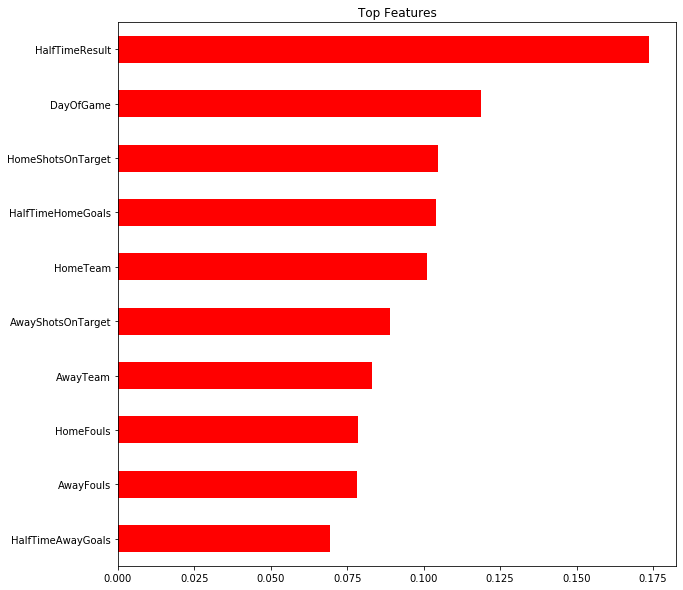

In [0]:
# get feature importances.
rf = model.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_val.columns)

# plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

# set the # of features.
n = 20
# set the figure size.
plt.figure(figsize=(10,n/2))
# give the graph a title.
plt.title(f'Top Features')
importances.sort_values()[-n:].plot.barh(color='red');

### Predictions.

#### Val data.

In [0]:
# val data predictions.
val_pred

array(['Away', 'Away', 'Tied', 'Home', 'Home', 'Away', 'Away', 'Away',
       'Home', 'Home', 'Home', 'Home', 'Tied', 'Home', 'Home', 'Home',
       'Away', 'Away', 'Home', 'Home', 'Away', 'Away', 'Tied', 'Home',
       'Tied', 'Home', 'Home', 'Home', 'Home', 'Away', 'Home', 'Away',
       'Home', 'Home', 'Away', 'Home', 'Away', 'Home', 'Home', 'Home',
       'Home', 'Home', 'Home', 'Away', 'Home', 'Home', 'Away', 'Away',
       'Home', 'Away', 'Tied', 'Tied', 'Home', 'Home', 'Home', 'Away',
       'Home', 'Home', 'Home', 'Home', 'Away', 'Home', 'Home', 'Away',
       'Away', 'Tied', 'Home', 'Tied', 'Home', 'Away', 'Home', 'Home',
       'Home', 'Home', 'Home', 'Away', 'Home', 'Away', 'Home', 'Home',
       'Away', 'Home', 'Home', 'Tied', 'Home', 'Away', 'Away', 'Home',
       'Home', 'Away', 'Away', 'Away', 'Away', 'Away', 'Home', 'Away',
       'Home', 'Home', 'Home', 'Home', 'Away', 'Tied', 'Home', 'Home',
       'Tied', 'Tied', 'Away', 'Away', 'Away', 'Tied', 'Away', 'Tied',
      

In [0]:
# create a new data frame for predictions vs. actuals.
val_predictions = pd.DataFrame({
    'GameDate': val_id, 
    'prediction': val_pred, 
    'Actual': y_val
})
# merge the new data frame with necessary features from origninal.
val_predictions = val_predictions.merge( 
     val[['GameDate', 'HomeTeam', 'AwayTeam']],
     how='left'
     
)
# show the shape of the data frame.
print(val_predictions.shape)
# show the data frame with headers.
val_predictions.head()

(201, 5)


,GameDate,prediction,Actual,HomeTeam,AwayTeam
0,2015-12-09,Away,Home,Man United,Liverpool
1,2000-01-15,Away,Away,Watford,Liverpool
2,2002-09-11,Tied,Home,Middlesboro,Liverpool
3,1994-05-02,Home,Tied,Norwich,Liverpool
4,2012-08-26,Home,Tied,Liverpool,Man City


In [0]:
val_final = val_predictions.sort_values('GameDate')
val_final.head(30)

,GameDate,prediction,Actual,HomeTeam,AwayTeam
62,1993-11-12,Home,Tied,Liverpool,Swindon
58,1994-01-10,Home,Home,Liverpool,Sheffield Weds
117,1994-02-19,Home,Home,Leeds,Liverpool
135,1994-03-12,Home,Tied,Coventry,Liverpool
75,1994-03-30,Away,Home,Man United,Liverpool
3,1994-05-02,Home,Tied,Norwich,Liverpool
195,1994-08-20,Home,Away,Crystal Palace,Liverpool
177,1994-09-17,Home,Home,Man United,Liverpool
41,1994-09-24,Home,Tied,Newcastle,Liverpool
161,1994-10-15,Home,Home,Blackburn,Liverpool


### Confusion matrix.

In [0]:
# import the necessary libraries for a confusion matrix.
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# create a plot_confusion_matrix function.
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

<Figure size 2880x1440 with 0 Axes>

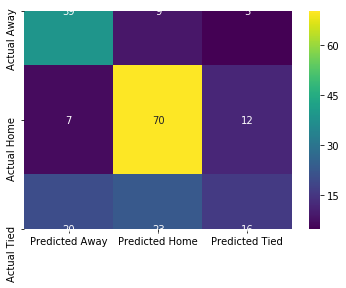

<Figure size 2880x1440 with 0 Axes>

In [0]:
plot_confusion_matrix(y_val, val_pred);
plt.figure(figsize=(40,20))

#### Test data.

In [0]:
# test data predictions.
test_pred

array(['Home', 'Home', 'Home', 'Home', 'Home', 'Home', 'Home', 'Home',
       'Home', 'Home', 'Tied', 'Home', 'Home', 'Home', 'Home', 'Home',
       'Home', 'Home', 'Home', 'Home', 'Away', 'Home', 'Home', 'Home',
       'Home', 'Home', 'Home', 'Home', 'Home', 'Home', 'Home', 'Home',
       'Away', 'Home', 'Home', 'Home', 'Home', 'Home'], dtype=object)

In [0]:
# create a new data frame for predictions vs. actuals.
test_predictions = pd.DataFrame({
    'GameDate': test_id, 
    'prediction': test_pred, 
    'Actual': y_test
})
# merge the new data frame with necessary features from origninal.
test_predictions = test_predictions.merge(
     test[['GameDate', 'HomeTeam', 'AwayTeam']], 
     how='left'
)
# show the shape of the data frame.
print(test_predictions.shape)
# show the data frame with headers.
test_predictions.head()

(38, 5)


,GameDate,prediction,Actual,HomeTeam,AwayTeam
0,2019-09-08,Home,NaN,Liverpool,Norwich
1,2019-08-24,Home,NaN,Liverpool,Arsenal
2,2019-09-14,Home,NaN,Liverpool,Newcastle
3,2019-05-10,Home,NaN,Liverpool,Leicester
4,2019-10-27,Home,NaN,Liverpool,Spurs


In [0]:
test_final = test_predictions.sort_values('GameDate')
test_final.head(30)

,GameDate,prediction,Actual,HomeTeam,AwayTeam
24,2019-02-11,Home,NaN,Aston Villa,Liverpool
7,2019-04-12,Home,NaN,Liverpool,Everton
3,2019-05-10,Home,NaN,Liverpool,Leicester
26,2019-07-12,Home,NaN,Bournemouth,Liverpool
19,2019-08-17,Home,NaN,Southampton,Liverpool
1,2019-08-24,Home,NaN,Liverpool,Arsenal
20,2019-08-31,Away,NaN,Burnley,Liverpool
0,2019-09-08,Home,NaN,Liverpool,Norwich
5,2019-09-11,Home,NaN,Liverpool,Man City
2,2019-09-14,Home,NaN,Liverpool,Newcastle
